In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from collections import Counter
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

Loading in the csv file. Change the base variable to the path up to the file name to use this code directly

In [2]:
base = "C:/Users/name/Dropbox/Misc/Data Vis Challenges/April 2018/"
df = pd.read_csv(base + "the-office-lines.csv", header=0)

In the actual lines in the dataset, there are words in brackets signifying someone is doing something for example [pam sneezes]. I didn't want to include these snippets of text in my analysis so I remove them by using the regular expressions python package. I also want to normalize my text for comparisons so I store the resulting strings to be all lower case.

In [167]:
temp=[]
for i in range(df.shape[0]):
    temp.append(re.sub("[\(\[].*?[\)\]]", "", df['line_text'][i]).lower())
df['line_text'] = temp

I also want the speaker tags to be lower case for simpler comparisons so I change them to lower case as well.

In [168]:
temp = []
for i in range(df.shape[0]):
    temp.append(df['speaker'][i].lower())
df['speaker'] = temp

I decided to split the data between lines that existed in the show as aired, and lines that were part of deleted scenes. I did this so that later I could do some comparison between the scenes if I wanted and also that my analysis reflects on lines on the show that aired.

In [169]:
notd = df.loc[df['deleted'] == False]
didd = df.loc[df['deleted'] == True]

I manually went through the speakers column of the data frame to verify all of the names in the main_speaks list were the way each character were addressed in the data. 

In [170]:
main_speaks = ['michael','dwight','jim','pam','ryan', 'andy',
              'robert', 'jan', 'roy', 'stanley', 'kevin',
              'meredith', 'angela', 'oscar', 'phyllis',
              'kelly', 'toby', 'creed', 'darryl','erin',
              'gabe', 'holly', 'nellie', 'clark', 'pete']

Next, I wanted to compile all the words said by individual characters. I do this first by subsetting the notd dataframe into a dataframe called sdf which contains only data for a specific speaker. Next, I ignore punctuation and create a list of only the letters or words from each line in the sdf dataframe. Once all the words by a speaker are in one list, I do a Counter of the words and store the result in a dictionary.

In [171]:
speak_words = {}
for i in main_speaks:
    sdf = notd.loc[df['speaker'] == i]
    allw = []
    for j in sdf['line_text']:
        lst = re.findall(r'\b\w+', j)
        allw.extend(lst)
    speak_words[i] = Counter(allw)

I now wanted to know how often one character says the name of the other characters. To do this, I simply loop through the main_speaks list and access that speakers Counter stored in the speak_words dictionary and then access each characters name. I originally made this graphic with just the number of times Jim said the word Michael for example but thought this isn't a fair comparison for characters who don't speak very often. I decided to normalize each characters mention count by their total words in the database. This isn't 'exactly' accurate since some words in the counter are 's' or 't' which are artifacts of removing punctuation earlier but its close. It also penalizes characters who speak more since spekaing more introduces more of these single letter artifacts. 

In [172]:
occ_matrix = []
for i in main_speaks:
    lst_occ = []
    for j in main_speaks:
        lst_occ.append(speak_words[i][j]/len(speak_words[i]))
    occ_matrix.append(lst_occ)
    

Lastly I create a heatmap with seaborn.

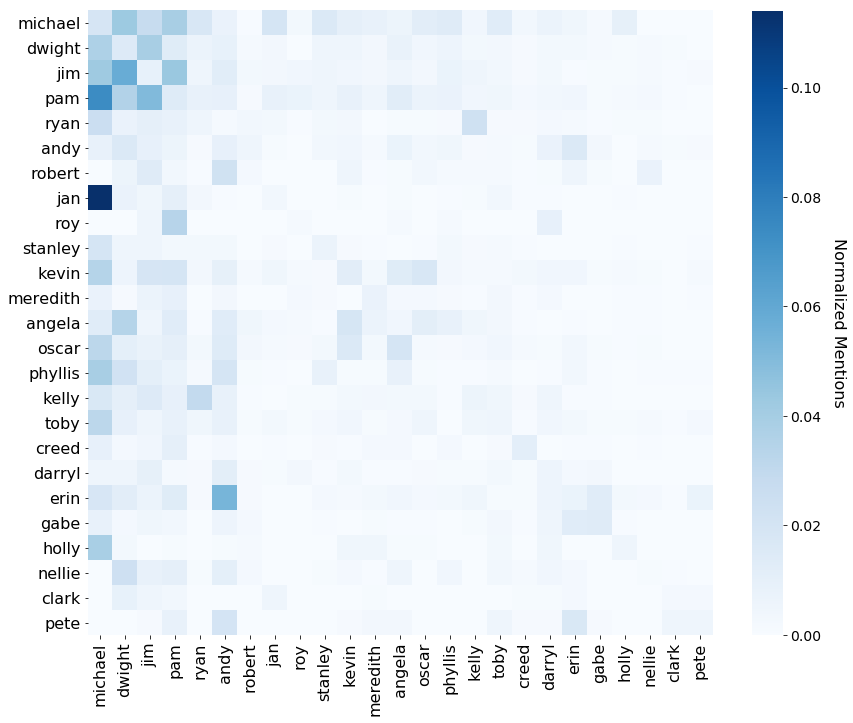

In [216]:
fig = plt.figure(figsize = (14,14))
ax = plt.subplot(111)
heat = sns.heatmap(occ_matrix, square=True, cmap = 'Blues', xticklabels=main_speaks,
                   yticklabels=main_speaks, ax = ax, cbar_kws={"shrink": .82})
ax.tick_params('both', labelsize = 16)
ax.collections[0].colorbar.set_label("Normalized Mentions", rotation = 270, labelpad = 25, size = 16)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)